In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Hotel_Bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


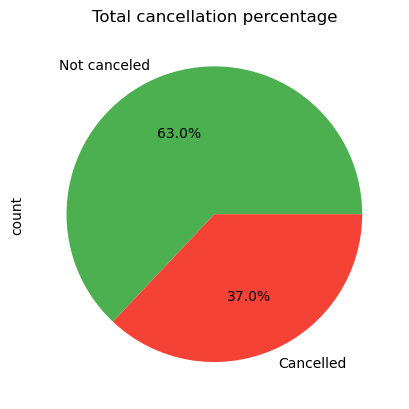

In [5]:
df['is_canceled'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    labels=["Not canceled", "Cancelled"], 
    colors=["#4CAF50", "#F44336"]
)
plt.title("Total cancellation percentage")
plt.show()
##This graph shows what percentage of reservations are left and what percentage are canceled.

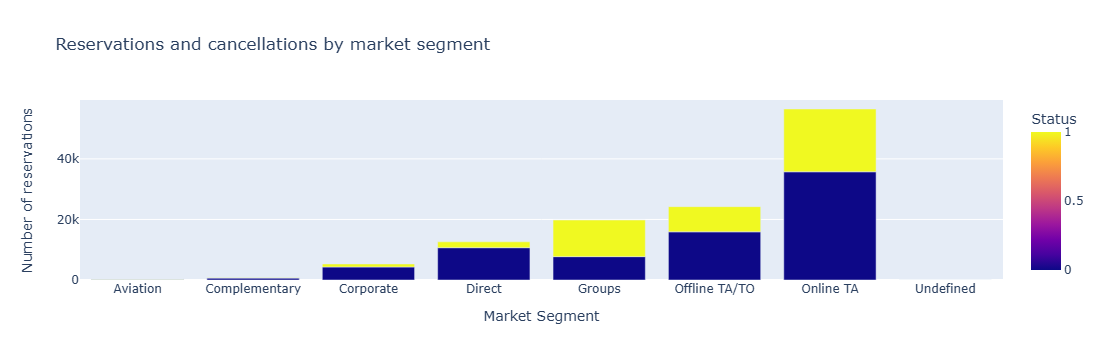

In [10]:
import plotly.express as px
import numpy as np
# We calculate the market segment and the number of cancellations
market_counts = df.groupby(['market_segment', 'is_canceled']).size().reset_index(name='count')

# Interactive bar chart
fig = px.bar(
    market_counts,
    x='market_segment',
    y='count',
    color='is_canceled',
    barmode='group',
    labels={'market_segment': 'Market Segment', 'count': 'Number of reservations', 'is_canceled': 'Status'},
    title="Reservations and cancellations by market segment"
)

fig.show()

## Online TA → brings in a lot of bookings, but also a high cancellation rate.

## Direct bookings → may be less, but are more stable.

## Corporate → generally more reliable

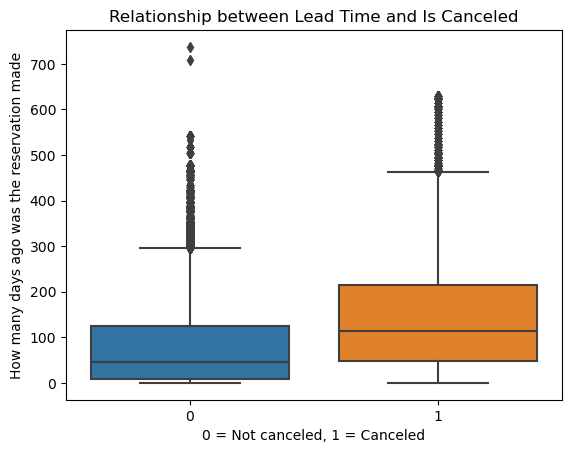

In [12]:
sns.boxplot(data=df, x='is_canceled', y='lead_time')
plt.title("Relationship between Lead Time and Is Canceled")
plt.xlabel("0 = Not canceled, 1 = Canceled")
plt.ylabel("How many days ago was the reservation made")
plt.show()

# Practical implications for hotels
# Long lead time reservations are risky → hotels can charge a non-refundable deposit from these guests to avoid future losses.
# Short lead time reservations are more reliable → hotels can rely on last minute booking campaigns.

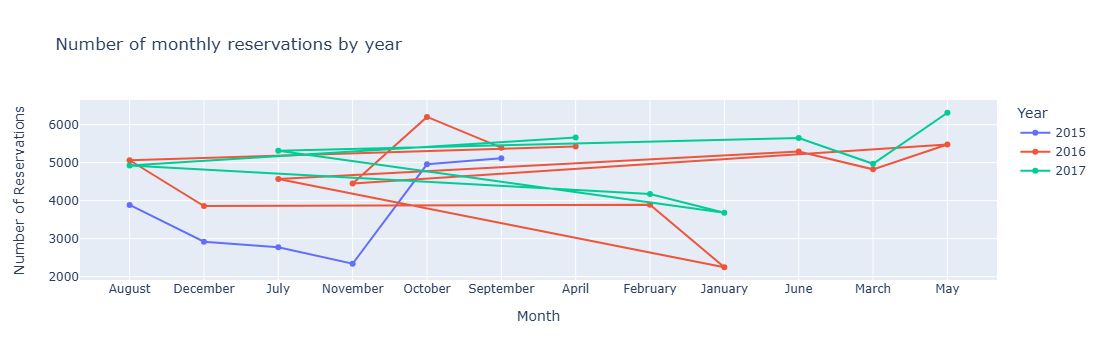

In [16]:
import plotly.express as px

# 1. Number of monthly reservations
monthly_res = df.groupby(['arrival_date_year', 'arrival_date_month']).size().reset_index(name='reservations')

# 2. We rearrange the order of the months.
months = ['January','February','March','April','May','June',
          'July','August','September','October','November','December']
monthly_res['arrival_date_month'] = pd.Categorical(monthly_res['arrival_date_month'], categories=months, ordered=True)

# 3. Line chart
fig = px.line(
    monthly_res,
    x="arrival_date_month",
    y="reservations",
    color="arrival_date_year",
    markers=True,
    labels={
        "arrival_date_month": "Month",
        "reservations": "Number of Reservations",
        "arrival_date_year": "Year"
    },
    title="Number of monthly reservations by year"
)

fig.show()


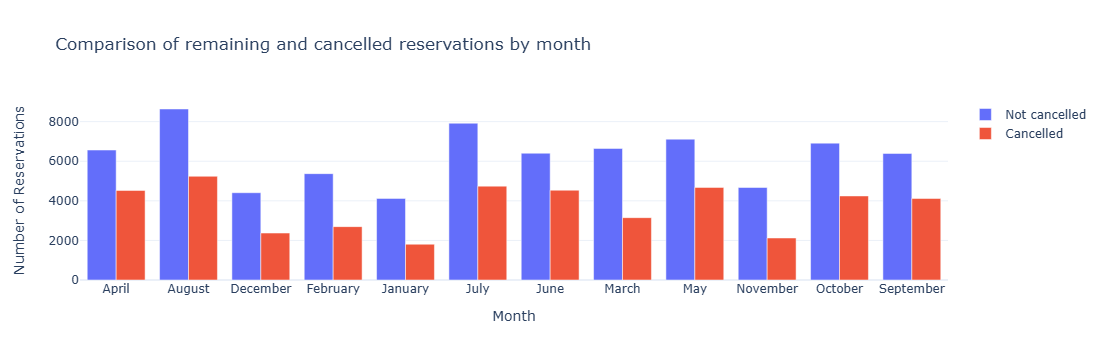

In [19]:
import plotly.graph_objects as go

# 1. Monthly reservation count (cancelled and not cancelled)
monthly_cancel = df.groupby(['arrival_date_month', 'is_canceled']).size().reset_index(name='count')

# 2. We rearrange the order of the months.
months = ['January','February','March','April','May','June',
          'July','August','September','October','November','December']
monthly_cancel['arrival_date_month'] = pd.Categorical(monthly_cancel['arrival_date_month'], categories=months, ordered=True)

# 3.
stayed = monthly_cancel[monthly_cancel['is_canceled'] == 0]
canceled = monthly_cancel[monthly_cancel['is_canceled'] == 1]

# 4. Bar chart
fig = go.Figure(data=[
    go.Bar(name='Not cancelled', x=stayed['arrival_date_month'], y=stayed['count']),
    go.Bar(name='Cancelled', x=canceled['arrival_date_month'], y=canceled['count'])
])

# 5. Design
fig.update_layout(
    barmode='group',
    title="Comparison of remaining and cancelled reservations by month",
    xaxis_title="Month",
    yaxis_title="Number of Reservations",
    template="plotly_white"
)

fig.show()


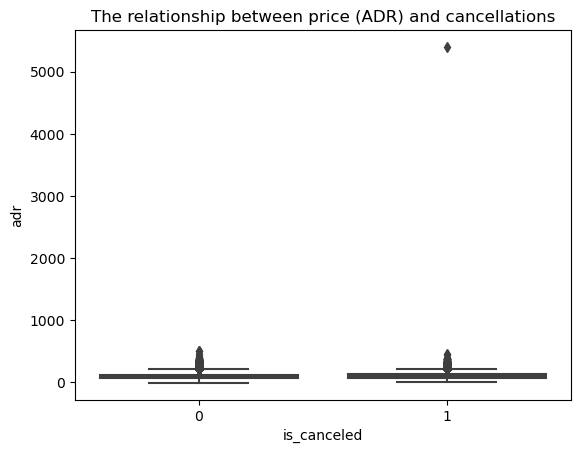

In [21]:
sns.boxplot(data=df, x='is_canceled', y='adr')
plt.title("The relationship between price (ADR) and cancellations")
plt.show()
